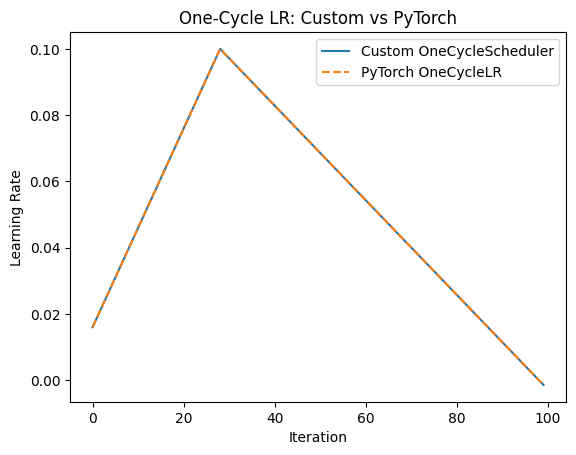

In [ ]:
import torch
import matplotlib.pyplot as plt

from implementation import OneCycleScheduler


total_steps = 100
base_lr = 0.01
max_lr = 0.1
final_div_factor = 1000.0
pct_start = 0.3

param1 = torch.nn.Parameter(torch.zeros(1))
param2 = torch.nn.Parameter(torch.zeros(1))

opt_custom = torch.optim.SGD([param1], lr=base_lr)
opt_torch = torch.optim.SGD([param2], lr=base_lr)

sched_custom = OneCycleScheduler(
    optimizer=opt_custom,
    cycle_length=total_steps,
    max_lr=max_lr,
    base_lr=base_lr,
    final_div_factor=final_div_factor,
    pct_start=pct_start,
)

init_lr = base_lr + (1 / int(total_steps * pct_start)) * (max_lr - base_lr)
div_factor = max_lr / init_lr

sched_torch = torch.optim.lr_scheduler.OneCycleLR(
    optimizer=opt_torch,
    max_lr=max_lr,
    total_steps=total_steps,
    pct_start=pct_start,
    anneal_strategy="linear",
    div_factor=div_factor,
    final_div_factor=final_div_factor,
)

lrs_custom = []
lrs_torch = []

for _ in range(total_steps):
    opt_custom.step()
    sched_custom.step()
    opt_torch.step()
    sched_torch.step()
    lrs_custom.append(opt_custom.param_groups[0]["lr"])
    lrs_torch.append(opt_torch.param_groups[0]["lr"])

plt.plot(lrs_custom, label="Custom OneCycleScheduler")
plt.plot(lrs_torch, label="PyTorch OneCycleLR", linestyle="--")
plt.xlabel("Iteration")
plt.ylabel("Learning Rate")
plt.legend()
plt.title("One-Cycle LR: Custom vs PyTorch")
plt.show()


In [43]:
print(lrs_custom[0], lrs_torch[0])
print(lrs_custom[-1], lrs_torch[-1])

0.016 0.016
-0.0014184285714285705 -0.0014153857142857051
